# [**Tracé avancé avec dépendance partielle**](https://nbviewer.org/github/Franck-PepperLabs/pepper_dsia_skl_doc_fr/blob/main/docs/examples/plot_partial_dependence_visualization_api.ipynb)<br/>([*Advanced Plotting With Partial Dependence*](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_partial_dependence_visualization_api.html))

L'objet [**`PartialDependenceDisplay`**](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html#sklearn.inspection.PartialDependenceDisplay) qui peut être utilisé pour tracer sans avoir à recalculer la dépendance partielle. Dans cet exemple, nous montrons comment tracer des graphiques de dépendance partielle et comment personnaliser rapidement le graphique avec l'API de visualisation.

> **Voir aussi** l'exemple [**Courbe ROC avec API de visualisation**](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_roc_curve_visualization_api.html#sphx-glr-auto-examples-miscellaneous-plot-roc-curve-visualization-api-py)

**NDLT** - Voir [**Interpretable ML - Partial Dependence Plot (PDP) (8.1.)**](https://christophm.github.io/interpretable-ml-book/pdp.html)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.inspection import PartialDependenceDisplay
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

# Entraîner des modèles sur l'ensemble de données sur le diabète

Tout d'abord, nous entraînons un arbre de décision et un perceptron multicouche sur l'ensemble de données sur le diabète.

**NDLT** - le paramètre `max_iter` a été porté de 500 à 10000 pour permettre la convergence de `mlp`.

In [2]:
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

tree = DecisionTreeRegressor()
mlp = make_pipeline(
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(100, 100), tol=1e-2, max_iter=10_000, random_state=0),
)
tree.fit(X, y)
mlp.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=10000,
                              random_state=0, tol=0.01))])

# Tracé de la dépendance partielle pour deux caractéristiques

Nous traçons des courbes de dépendance partielle pour les caractéristiques "age" et "bmi" (indice de masse corporelle) pour l'arbre de décision. Avec deux caractéristiques, [**`from_estimator`**](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html#sklearn.inspection.PartialDependenceDisplay.from_estimator) s'attend à tracer deux courbes. Ici, la fonction `plot` place une grille de deux graphiques en utilisant l'espace défini par `ax`.

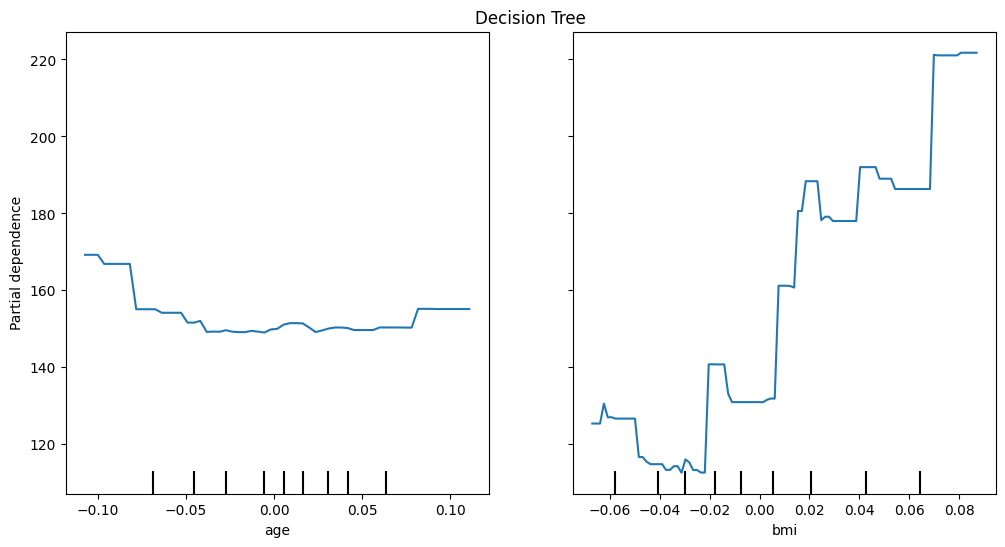

In [3]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree")
tree_disp = PartialDependenceDisplay.from_estimator(tree, X, ["age", "bmi"], ax=ax)

Les courbes de dépendance partielle peuvent être tracées pour le perceptron multicouche. Dans ce cas, `line_kw` est passé à [**`from_estimator`**](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html#sklearn.inspection.PartialDependenceDisplay.from_estimator) pour changer la couleur de la courbe.

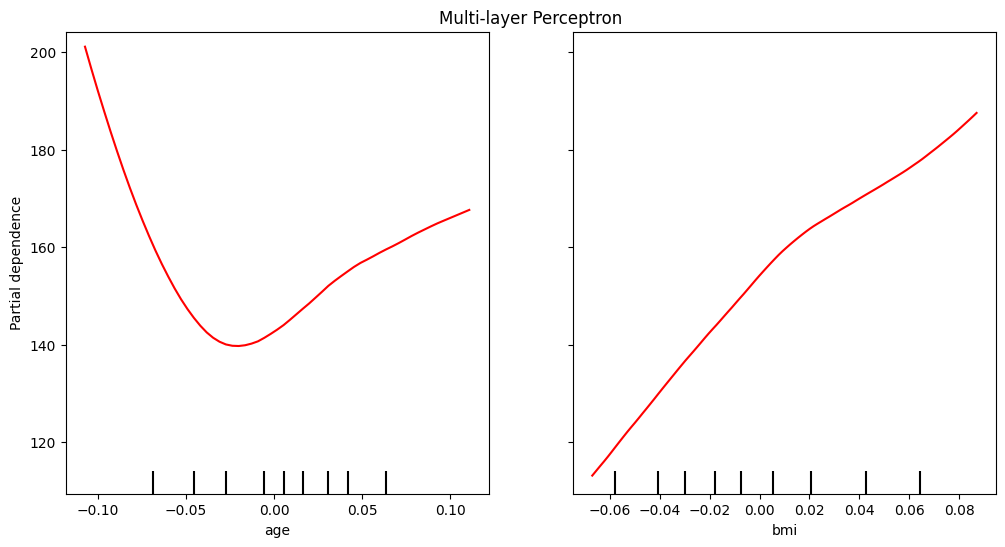

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Multi-layer Perceptron")
mlp_disp = PartialDependenceDisplay.from_estimator(
    mlp, X, ["age", "bmi"], ax=ax, line_kw={"color": "red"}
)

## Tracé de la dépendance partielle des deux modèles ensemble

Les objets `tree_disp` et `mlp_disp` [**`PartialDependenceDisplay`**](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html) contiennent toutes les informations calculées nécessaires pour recréer les courbes de dépendance partielle. Cela signifie que nous pouvons facilement créer des tracés supplémentaires sans avoir à recalculer les courbes.

Une façon de tracer les courbes consiste à les placer dans la même figure, avec les courbes de chaque modèle sur chaque ligne. Tout d'abord, nous créons une figure avec deux axes sur deux lignes et une colonne. Les deux axes sont transmis aux fonctions [**`plot`**](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html#sklearn.inspection.PartialDependenceDisplay.plot) de `tree_disp` et `mlp_disp`. Les axes donnés seront utilisés par la fonction de traçage pour dessiner la dépendance partielle. Le tracé résultant place les courbes de dépendance partielle de l'arbre de décision dans la première rangée et celle du perceptron multicouche dans la deuxième rangée.

Text(0.5, 1.0, 'Multi-layer Perceptron')

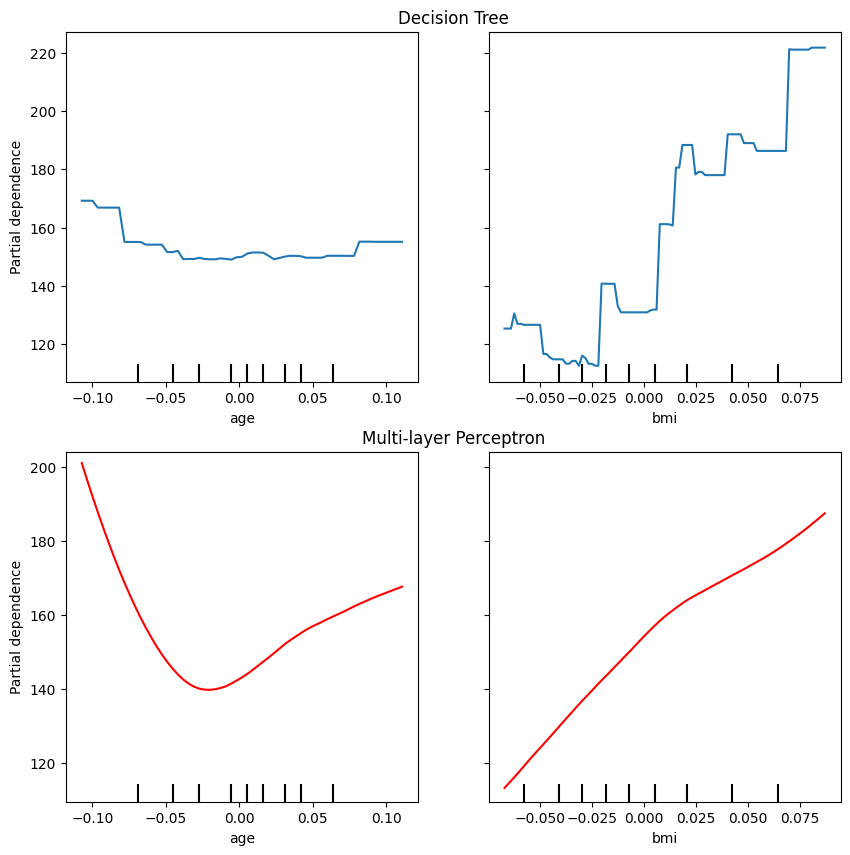

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
tree_disp.plot(ax=ax1)
ax1.set_title("Decision Tree")
mlp_disp.plot(ax=ax2, line_kw={"color": "red"})
ax2.set_title("Multi-layer Perceptron")

Une autre façon de comparer les courbes consiste à les tracer les unes au-dessus des autres. Ici, nous créons une figure sur une ligne et deux colonnes. Les axes sont passés dans la fonction [**`plot`**](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html#sklearn.inspection.PartialDependenceDisplay.plot) sous forme de liste, qui tracera les courbes de dépendance partielle de chaque modèle sur les mêmes axes. La longueur de la liste des axes doit être égale au nombre de graphiques dessinés.

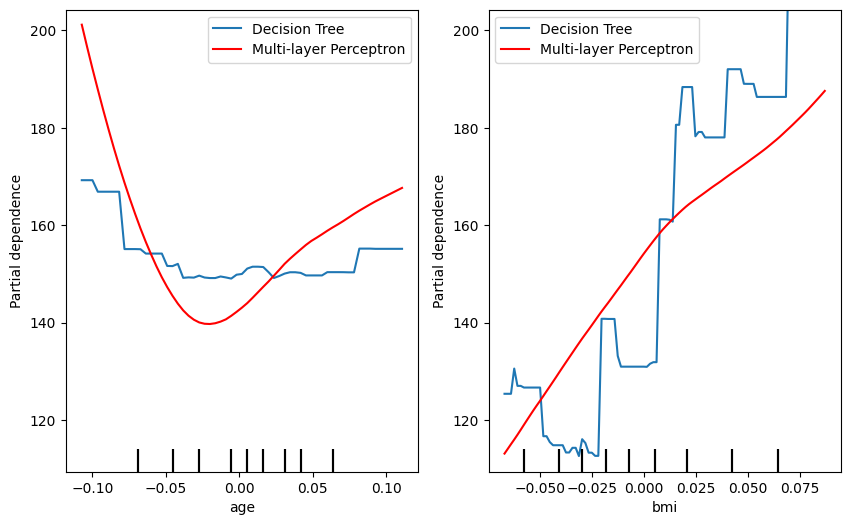

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
tree_disp.plot(ax=[ax1, ax2], line_kw={"label": "Decision Tree"})
mlp_disp.plot(
    ax=[ax1, ax2], line_kw={"label": "Multi-layer Perceptron", "color": "red"}
)
ax1.legend()
ax2.legend()

`tree_disp.axes_` est un conteneur de tableau Numpy des axes utilisés pour dessiner les tracés de dépendance partielle. Il peut être passé à `mlp_disp` pour avoir le même effet de dessiner les tracés les uns sur les autres. De plus, `mlp_disp.figure_` stocke la figure, ce qui permet de la redimensionner après avoir appelé `plot`. Dans ce cas, `tree_disp.axes_` a deux dimensions, donc `plot` n'affichera que l'étiquette `y` et les graduations `y` sur le tracé le plus à gauche.

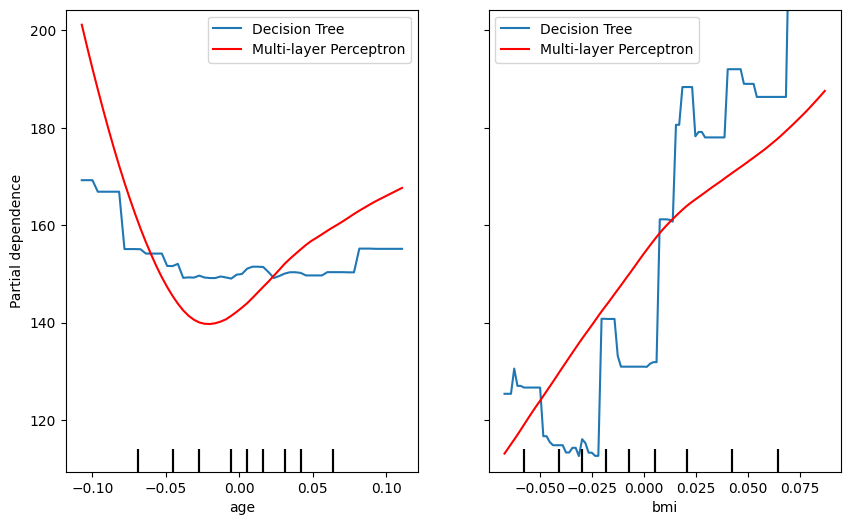

In [7]:
tree_disp.plot(line_kw={"label": "Decision Tree"})
mlp_disp.plot(
    line_kw={"label": "Multi-layer Perceptron", "color": "red"}, ax=tree_disp.axes_
)
tree_disp.figure_.set_size_inches(10, 6)
tree_disp.axes_[0, 0].legend()
tree_disp.axes_[0, 1].legend()
plt.show()

# Tracé de la dépendance partielle pour une caractéristique

Ici, nous traçons les courbes de dépendance partielle pour une seule caractéristique, "age", sur les mêmes axes. Dans ce cas, `tree_disp.axes_` est passé dans la deuxième fonction `plot`.

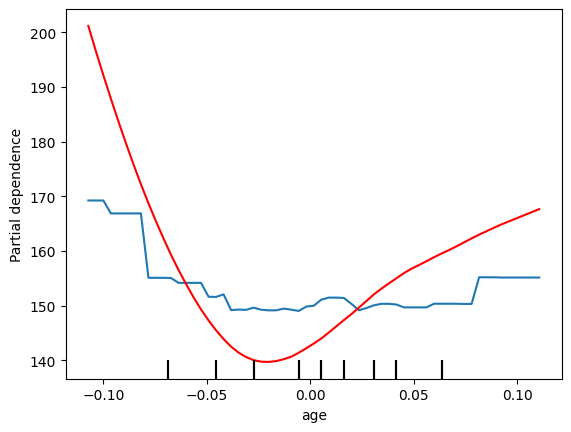

In [8]:
tree_disp = PartialDependenceDisplay.from_estimator(tree, X, ["age"])
mlp_disp = PartialDependenceDisplay.from_estimator(
    mlp, X, ["age"], ax=tree_disp.axes_, line_kw={"color": "red"}
)